In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

In [199]:
data = pd.read_csv("data.csv")

In [200]:
data.head()

,Unnamed: 0,CGPA,IQ,Study,Placed
0,0,7.50,111,2,No
1,1,9.80,106,11,Yes
2,2,8.93,111,9,Yes
3,3,8.39,80,11,No
4,4,6.62,107,3,No


In [201]:
data.shape

(100, 5)

In [202]:
le = LabelEncoder()
data['Placed_encoded'] = le.fit_transform(data['Placed'])

In [203]:
data['Placed_encoded']

0     0
1     1
2     1
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Placed_encoded, Length: 100, dtype: int64

In [204]:
data

,Unnamed: 0,CGPA,IQ,Study,Placed,Placed_encoded
0,0,7.50,111,2,No,0
1,1,9.80,106,11,Yes,1
2,2,8.93,111,9,Yes,1
3,3,8.39,80,11,No,0
4,4,6.62,107,3,No,0
...,...,...,...,...,...,...
95,95,7.98,98,7,No,0
96,96,8.09,109,7,No,0
97,97,7.71,115,5,No,0
98,98,6.10,114,6,No,0


In [205]:
X = data[['CGPA', 'IQ', 'Study']]
y = data['Placed_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
X_train.shape

(80, 3)

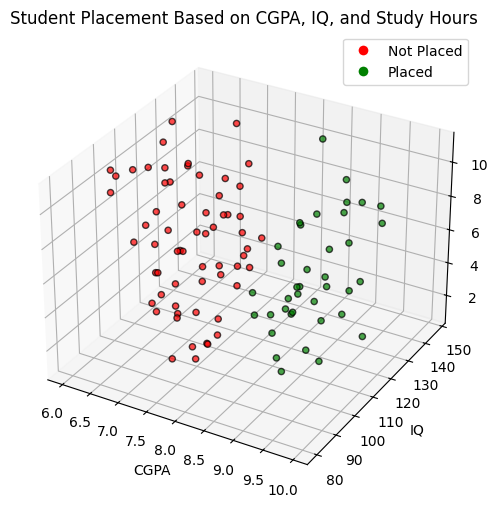

In [207]:

# Plotting
data = data.copy()
data['Placed'] = data['Placed'].map({'No': 0, 'Yes': 1})
y = data['Placed']

colors = ['red' if label == 0 else 'green' for label in y]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['CGPA'], data['IQ'], data['Study'], c=colors, alpha=0.7, edgecolors='k')

ax.set_title('Student Placement Based on CGPA, IQ, and Study Hours')
ax.set_xlabel('CGPA')
ax.set_ylabel('IQ')
ax.set_zlabel('Study')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Not Placed', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Placed', markerfacecolor='green', markersize=8)
]
ax.legend(handles=legend_elements)

plt.show()

In [208]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [209]:
y_pred = knn.predict(X_test)

In [210]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

In [214]:
def predict_placement(cgpa, iq, Study):
    input_data = np.array([[cgpa, iq, Study]])
    prediction = knn.predict(input_data)[0]
    label = le.inverse_transform([prediction])[0]
    return label

# Example usage
predict_placement(7.5, 110, 8)

c:\Users\Arnav Mathur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'No'